# Fig. 8: Frequency Change $\Delta f$ vs. particle separation

This notebook reproduces Fig. 8 in the paper, which shows the the frequency change $\Delta f$ as a function of particle separation for a particle located above the centre of the nanodisc (x = 0 nm, y = 0 nm) as well as for an off-centre particle (x = 0 nm, y = 20 nm).

In [1]:
import matplotlib.lines as mlines
import matplotlib.pyplot as plt
import pandas as pd
from style_helpers import style_cycle

%matplotlib inline
plt.style.use('style_sheets/custom_style.mplstyle')

Read the data frame containing the eigenmode data and filter out the parameter values relevant for this plot.

In [2]:
df = pd.read_csv('../data/eigenmode_info_data_frame.csv')
df = df.query('(has_particle == True) & (d_particle == 20) & (Ms_particle == 1e6) & (Hz == 8e4)')
df = df.sort_values('d')

Define a few helper functions which are used to produce the plot below.

In [3]:
def create_figure_and_inset():
    """
    Create matplotlib figure with two axes ax1, ax2,
    where ax2 is an inset inside ax1.
    
    Returns the figure `fig`, as well as ax1 and ax2.
    """
    fig, ax1 = plt.subplots(figsize=(8, 6))
    ax1.spines['right'].set_visible(False)
    ax1.spines['top'].set_visible(False)
    ax1.xaxis.set_ticks_position('bottom')
    ax1.yaxis.set_ticks_position('left')

    ax2 = fig.add_axes([0.48, 0.48, 0.4, 0.4], frameon=True)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.xaxis.set_ticks_position('bottom')
    ax2.yaxis.set_ticks_position('left')
    ax2.set_axis_bgcolor('none')
    
    return fig, ax1, ax2

In [4]:
def plot_freq_change_vs_particle_distance_for_mode(ax, N, df, linestyle='o-', **mpl_kwargs):
    """
    Plot a single curve showing `delta_f` vs. particle separation `d`
    for the eigenmode `N`.
    """
    df_filtered = df.query('N == {N}'.format(N=N)).sort_values('d')

    d_vals = df_filtered['d']
    freq_diffs = df_filtered['freq_diff'] * 1e3  # frequency change in MHz, not GHz

    ax.plot(d_vals, freq_diffs, linestyle, label='N={N}'.format(N=N), **mpl_kwargs)

In [5]:
def plot_frequency_change_vs_particle_distance(
        ax, x, y, ann, Nvals, ylim=None, linestyle='-',
        use_custom_style=True, xticks=None, yticks=None,
        xlabel='Particle separation d (nm)',
        ylabel=r'Frequency change $\;\Delta f$ (MHz)',
        labelfontsize=18, tickfontsize=16,
        ann_xy=(0.125, 0.95), ann_fontsize=18,
        show_legend=True, show_zero_freq_line=True):
    """
    Plot curves for all eigenmodes (i.e. all values of `N`)
    showing the dependence of `delta_f` on particle separation `d`.

    The arguments `x` and `y` represent the x/y-coordinates of the
    nanoparticle.
    """
    
    df_filtered = df.query('x == {x} and y == {y}'.format(x=x, y=y))
    
    Nmin = min(Nvals)
    Nmax = max(Nvals)
    for N, style_kwargs in reversed(list(zip(range(Nmin, Nmax+1), style_cycle))):
        if N not in Nvals:
            continue

        plot_freq_change_vs_particle_distance_for_mode(ax, N, df_filtered, linestyle=linestyle, **style_kwargs)

    if show_zero_freq_line:
        ax.plot([0, 90], [0, 0], '--k', linewidth=2)

    if xticks:
        ax.set_xticks(xticks)
    if yticks:
        ax.set_yticks(yticks)

    plt.setp(ax.get_xticklabels(), fontsize=tickfontsize)
    plt.setp(ax.get_yticklabels(), fontsize=tickfontsize)

    ax.annotate(ann,
                xy=ann_xy, xycoords='axes fraction',
                xytext=(0, 0), textcoords='offset points',
                #arrowprops=dict(facecolor='black', shrink=0.05),
                horizontalalignment='left', verticalalignment='center',
                fontsize=ann_fontsize,
                )
    ax.set_xlabel(xlabel, fontsize=labelfontsize)
    ax.set_ylabel(ylabel, fontsize=labelfontsize)
    if show_legend:
        ax.legend(numpoints=1, loc='best')
    ax.set_xlim(0, 90)
    ax.set_ylim(ylim)

In [6]:
# Define keyword arguments for the inset, which will be
# passed to the plotting function below.

kwargs_for_inset = {
    'Nvals': [1, 3, 4],
    'show_legend': False,
    'xlabel': 'd (nm)',
    'ylabel': r'$\Delta f$ (MHz)',
    'show_zero_freq_line': False,
    'ylim': (2, 600),
    'labelfontsize': 14,
    'tickfontsize': 13,
    'ann_fontsize': 14,
    'ann_xy': (0.2, 0.9), 
    'xticks': [0, 15, 30, 45, 60, 75, 90],
    'yticks': [0, 200, 400, 600],
    }

Produce the plot for Fig. 8.

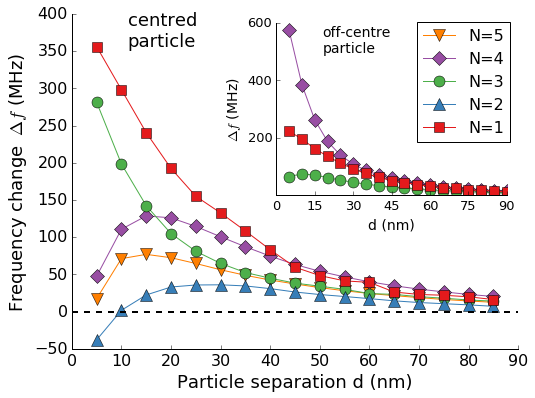

In [7]:
fig, ax1, ax2 = create_figure_and_inset()

plot_frequency_change_vs_particle_distance(x=0, y=0, ann='centred\nparticle', ax=ax1, Nvals=[1, 2, 3, 4, 5])
plot_frequency_change_vs_particle_distance(x=0, y=20, ann='off-centre\nparticle', ax=ax2, **kwargs_for_inset)